# **The Sparks Foundation**

### Author: Leah Nguyen
Copyright © 2021 Leah Nguyen

## **Task 4 - Exploratory Data Analysis - Terrorism**
In this exercise, we will perform **‘Exploratory Data Analysis’** on dataset **‘Global Terrorism’** in order to find out the hot zone of terrorism.

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
import folium
from folium.plugins import MarkerCluster

### Load Dataset

In [4]:
# Importing data
data = pd.read_csv("globalterrorism.csv", encoding = "ISO-8859-1")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# Inspect the columns
for (i, item) in enumerate(data, start=0):
    print(i, item)

0 eventid
1 iyear
2 imonth
3 iday
4 approxdate
5 extended
6 resolution
7 country
8 country_txt
9 region
10 region_txt
11 provstate
12 city
13 latitude
14 longitude
15 specificity
16 vicinity
17 location
18 summary
19 crit1
20 crit2
21 crit3
22 doubtterr
23 alternative
24 alternative_txt
25 multiple
26 success
27 suicide
28 attacktype1
29 attacktype1_txt
30 attacktype2
31 attacktype2_txt
32 attacktype3
33 attacktype3_txt
34 targtype1
35 targtype1_txt
36 targsubtype1
37 targsubtype1_txt
38 corp1
39 target1
40 natlty1
41 natlty1_txt
42 targtype2
43 targtype2_txt
44 targsubtype2
45 targsubtype2_txt
46 corp2
47 target2
48 natlty2
49 natlty2_txt
50 targtype3
51 targtype3_txt
52 targsubtype3
53 targsubtype3_txt
54 corp3
55 target3
56 natlty3
57 natlty3_txt
58 gname
59 gsubname
60 gname2
61 gsubname2
62 gname3
63 gsubname3
64 motive
65 guncertain1
66 guncertain2
67 guncertain3
68 individual
69 nperps
70 nperpcap
71 claimed
72 claimmode
73 claimmode_txt
74 claim2
75 claimmode2
76 claimmode2_txt

- **Finding:** As we can see, there are many unnecessary columns in this dataset. Therefore, we need to generate a new dataset that only use for this particular case study which only retain the columns require to generate our insights.

### Generate Usable Dataframe

In [6]:
terror_data = pd.read_csv('globalterrorism.csv', encoding = 'ISO-8859-1', usecols=[0, 1, 2, 8, 10, 11, 12, 13, 14, 29, 35, 84, 98, 101])

# Since the columns name of the raw dataset are very confusing, 
# we will need to remove to better describe the column values
terror_data = terror_data.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month',
             'country_txt':'country','region_txt' : 'region','provstate': 'state', 'targtype1_txt':'target',
             'weapsubtype1_txt': 'weapon', 'attacktype1_txt': 'attacktype', 'nkill':'fatalities', 
             'nwound':'injuries'})

### Data Exploration

In [7]:
# Inspect the first 5 rows
terror_data.head()

,id,year,month,country,region,state,city,latitude,longitude,attacktype,target,weapon,fatalities,injuries
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,NaN,1.0,0.0
1,197000000002,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),NaN,0.0,0.0
2,197001000001,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,NaN,1.0,0.0
3,197001000002,1970,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown Explosive Type,NaN,NaN
4,197001000003,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,NaN


In [8]:
# Inspect the last 5 rows
terror_data.tail()

,id,year,month,country,region,state,city,latitude,longitude,attacktype,target,weapon,fatalities,injuries
181686,201712310022,2017,12,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,Military,Unknown Gun Type,1.0,2.0
181687,201712310029,2017,12,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,Military,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0
181688,201712310030,2017,12,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,Arson/Fire,0.0,0.0
181689,201712310031,2017,12,India,South Asia,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,Government (General),Grenade,0.0,0.0
181690,201712310032,2017,12,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,Bombing/Explosion,Unknown,Unknown Explosive Type,0.0,0.0


In [9]:
#Inspect data shape
terror_data.shape

(181691, 14)

In [10]:
# Inspect the number of obsevation years
print(terror_data['year'].unique())
print("year span: ", max(terror_data['year'] - min(terror_data['year'])), 'years')

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
year span:  47 years


In [11]:
# Inspect the number of obsevation years
print(terror_data['country'].unique())

['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'West Bank and Gaza Strip' 'Austria' 'Czechoslovakia' 'India'
 'France' 'South Vietnam' 'Brunei' 'Zaire'
 "People's Republic of the Congo" 'Portugal' 'Algeria' 'El Salvador'
 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus' 'Myanmar' 'Afghanistan'
 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador' 'New Zealand' 'Malaysia'
 'Singapore' 'Botswana' 'Jamaica' 'Chad' 'North Yemen' 'Andorra' 'Syria'
 'South Korea' 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq'
 'Somalia' 'Tanzania' 'Sri Lanka' 'Namibia' '

In [12]:
# Inspect the missing value
terror_data.isnull().sum()

id                0
year              0
month             0
country           0
region            0
state           421
city            434
latitude       4556
longitude      4557
attacktype        0
target            0
weapon        20768
fatalities    10313
injuries      16311
dtype: int64

In [13]:
# Convert data types
terror_data['fatalities'] = terror_data['fatalities'].fillna(0).astype(int)
terror_data['injuries'] = terror_data['injuries'].fillna(0).astype(int)

# Fill missing value
terror_data['weapon'] = terror_data['weapon'].fillna("Unknown").astype(str)
terror_data = terror_data.dropna(how='any', subset=['latitude', 'longitude', 'city', 'state'])

# Inspect the missing value
terror_data.isnull().sum()

id            0
year          0
month         0
country       0
region        0
state         0
city          0
latitude      0
longitude     0
attacktype    0
target        0
weapon        0
fatalities    0
injuries      0
dtype: int64

### Terrorist in the US

#### 1. Filter Data

In [14]:
terror_us = terror_data[terror_data['country'] == 'United States']
terror_us.head()

,id,year,month,country,region,state,city,latitude,longitude,attacktype,target,weapon,fatalities,injuries
5,197001010002,1970,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,Armed Assault,Police,Unknown Gun Type,0,0
7,197001020002,1970,1,United States,North America,California,Oakland,37.791927,-122.225906,Bombing/Explosion,Utilities,Unknown Explosive Type,0,0
8,197001020003,1970,1,United States,North America,Wisconsin,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,Military,Molotov Cocktail/Petrol Bomb,0,0
9,197001030001,1970,1,United States,North America,Wisconsin,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,Government (General),Gasoline or Alcohol,0,0
10,197001050001,1970,1,United States,North America,Wisconsin,Baraboo,43.468500,-89.744299,Bombing/Explosion,Military,Unknown Explosive Type,0,0


#### 2. Attack Types

In [15]:
# Inspect the attack types
print(terror_us['attacktype'].unique())

['Armed Assault' 'Bombing/Explosion' 'Facility/Infrastructure Attack'
 'Assassination' 'Hijacking' 'Unarmed Assault'
 'Hostage Taking (Kidnapping)' 'Hostage Taking (Barricade Incident)'
 'Unknown']


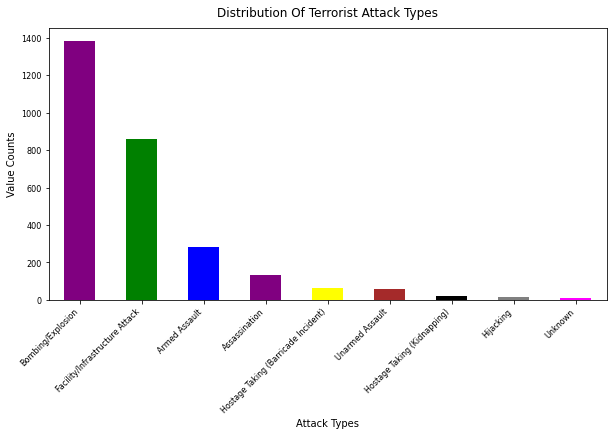

In [16]:
# Inspect the most frequent attack types
attacktype = pd.DataFrame(terror_us['attacktype'].value_counts())

# color list for bar chart bar color 
colors = ['purple', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] 

# Plot
attacktype['attacktype'].plot(kind = 'bar', color = colors, fontsize = 8, figsize = (10,5))
plt.xticks(rotation=45, horizontalalignment='right')

# Labels
plt.xlabel('Attack Types')
plt.ylabel('Value Counts')
plt.title('Distribution Of Terrorist Attack Types', y=1.02, fontsize=12)

plt.show()

#### 3. Target Types

In [17]:
# Inspect the targets
print(terror_us['target'].unique())

['Police' 'Utilities' 'Military' 'Government (General)' 'Business'
 'Educational Institution' 'Violent Political Party'
 'Private Citizens & Property' 'Religious Figures/Institutions' 'Unknown'
 'Transportation' 'NGO' 'Telecommunication' 'Government (Diplomatic)'
 'Food or Water Supply' 'Terrorists/Non-State Militia' 'Other'
 'Journalists & Media' 'Airports & Aircraft' 'Tourists' 'Maritime'
 'Abortion Related']


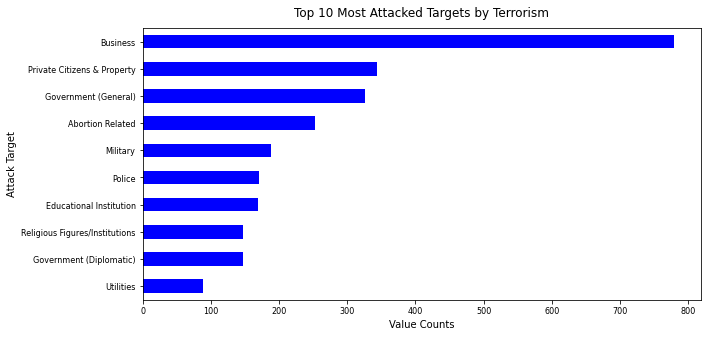

In [18]:
# Inspect Top 10 most attacked targets
target = pd.DataFrame(terror_us['target'].value_counts().sort_values().tail(10))

# Plot
target['target'].plot(kind = 'barh', color = 'blue', fontsize = 8, figsize = (10,5))

# Labels
plt.xlabel('Value Counts')
plt.ylabel('Attack Target')

# scale the title up by 2% to match pctdistance
plt.title('Top 10 Most Attacked Targets by Terrorism', y=1.02) 

plt.show()

#### 4. Weapon Types

In [19]:
# Inspect the weapon types
print(terror_us['weapon'].unique())

['Unknown Gun Type' 'Unknown Explosive Type'
 'Molotov Cocktail/Petrol Bomb' 'Gasoline or Alcohol' 'Arson/Fire'
 'Pipe Bomb' 'Dynamite/TNT' 'Rifle/Shotgun (non-automatic)' 'Vehicle'
 'Time Fuse' 'Other Explosive Type' 'Unknown' 'Poisoning'
 'Projectile (rockets, mortars, RPGs, etc.)' 'Handgun' 'Letter Bomb'
 'Automatic or Semi-Automatic Rifle' 'Blunt Object' 'Sticky Bomb'
 'Grenade' 'Knife or Other Sharp Object' 'Hands, Feet, Fists' 'Explosive'
 'Rope or Other Strangling Device' 'Pressure Trigger' 'Remote Trigger'
 'Unknown Weapon Type' 'Suicide (carried bodily by human being)'
 'Other Gun Type']


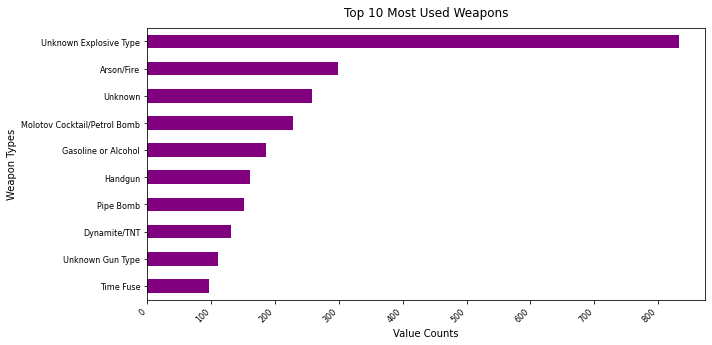

In [20]:
# Inspect the most used weapons
weapontype = pd.DataFrame(terror_us['weapon'].value_counts().sort_values().tail(10))

# Plot
weapontype['weapon'].plot(kind = 'barh', color = 'purple', fontsize = 8, figsize = (10,5))
plt.xticks(rotation=45, horizontalalignment='right')

# Labels
plt.xlabel('Value Counts')
plt.ylabel('Weapon Types')

# scale the title up by 2% to match pctdistance
plt.title('Top 10 Most Used Weapons', y=1.02, fontsize=12)

plt.show()

#### 5. Terrorist Attacks by Locations

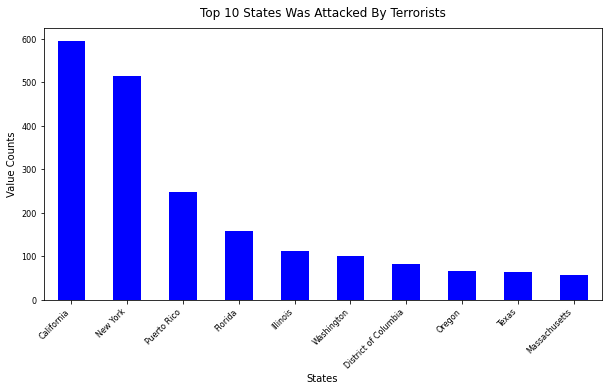

In [21]:
# Terrorist Attacks by States
state = pd.DataFrame(terror_us['state'].value_counts().head(10))

# Plot
state['state'].plot(kind = 'bar', color = 'blue', fontsize = 8, figsize = (10,5))
plt.xticks(rotation=45, horizontalalignment='right')

# Labels
plt.xlabel('States')
plt.ylabel('Value Counts')
plt.title('Top 10 States Was Attacked By Terrorists', y=1.02, fontsize=12)

plt.show()

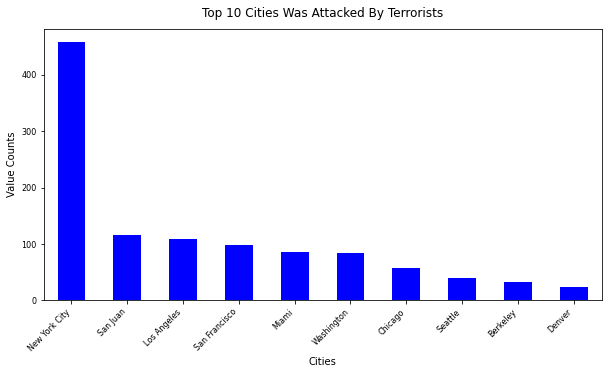

In [22]:
# Terrorist Attacks by Cities
cities = pd.DataFrame(terror_us['city'].value_counts().head(10))

# Plot
cities['city'].plot(kind = 'bar', color = 'blue', fontsize = 8, figsize = (10,5))
plt.xticks(rotation=45, horizontalalignment='right')

# Labels
plt.xlabel('Cities')
plt.ylabel('Value Counts')
plt.title('Top 10 Cities Was Attacked By Terrorists', y=1.02, fontsize=12)

plt.show()

#### 6. Injuries and Deaths by Terrorist

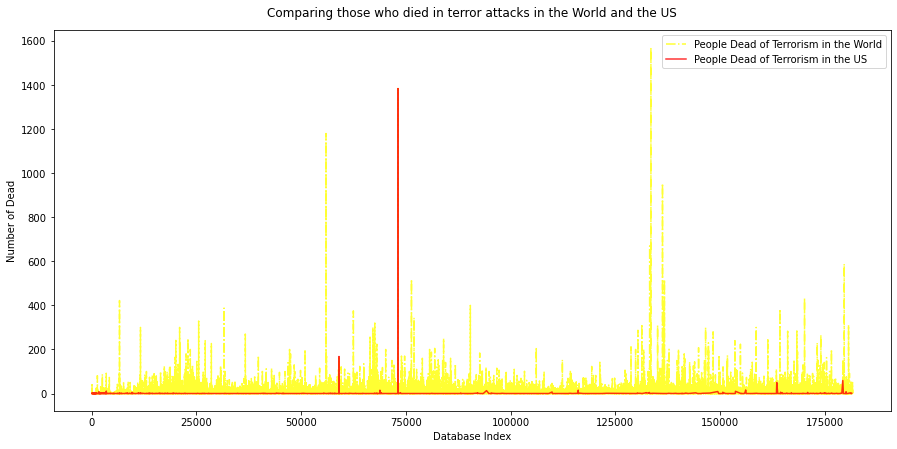

In [23]:
terror_data['fatalities'].plot(kind = 'line', color = 'yellow', label = 'People Dead of Terrorism in the World', linewidth = 1.5, alpha = 0.8, grid = False, 
                 linestyle = '-.', figsize = (15,7), fontsize=10)
terror_us['fatalities'].plot(color = "red", label = 'People Dead of Terrorism in the US', linewidth = 1.5, alpha = 0.8, 
                            grid = False, linestyle = '-', figsize = (15,7), fontsize=10)

plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('Database Index', fontsize=10)              # label = name of label
plt.ylabel('Number of Dead', fontsize=10)

plt.title('Comparing those who died in terror attacks in the World and the US', y=1.02)            #plot title
plt.show()

Let's look more scrutiny at the number of terrorist attacks each year.

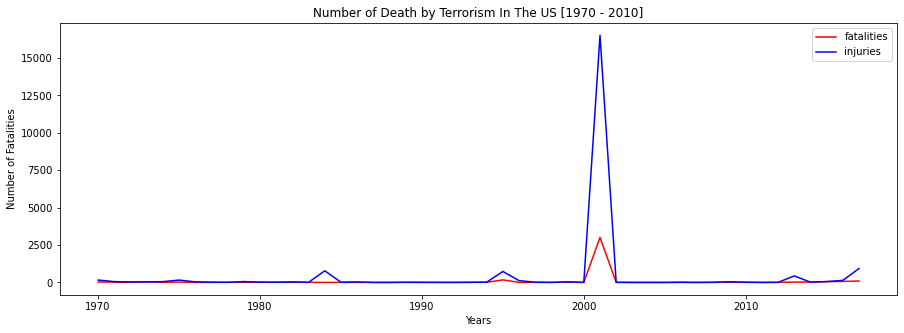

In [24]:
# Total fatalities and injuries by year
terror_year = terror_us.groupby('year')['fatalities', 'injuries'].sum()

# Plot
terror_year.plot(kind = 'line', color = ['red', 'blue'], figsize = (15,5))

plt.title('Number of Death by Terrorism In The US [1970 - 2010]')
plt.ylabel('Number of Fatalities')
plt.xlabel('Years')

plt.show()

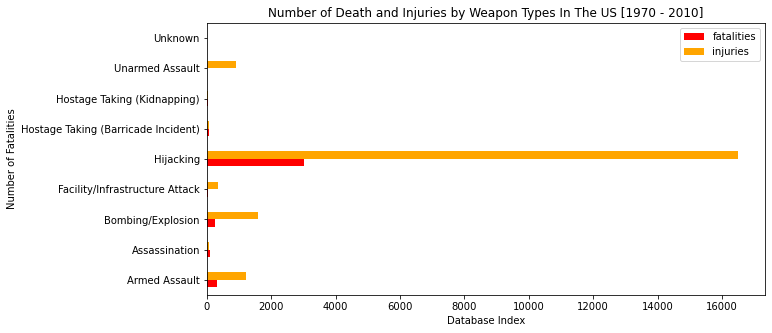

In [25]:
# Total fatalities and injuries by attack types
terror_attack = terror_us.groupby('attacktype')['fatalities', 'injuries'].sum()

# Plot
terror_attack.plot(kind = 'barh', color = ['red', 'orange'], figsize = (10,5))

plt.title('Number of Death and Injuries by Weapon Types In The US [1970 - 2010]')
plt.ylabel('Number of Fatalities')
plt.xlabel('Database Index')

plt.show()

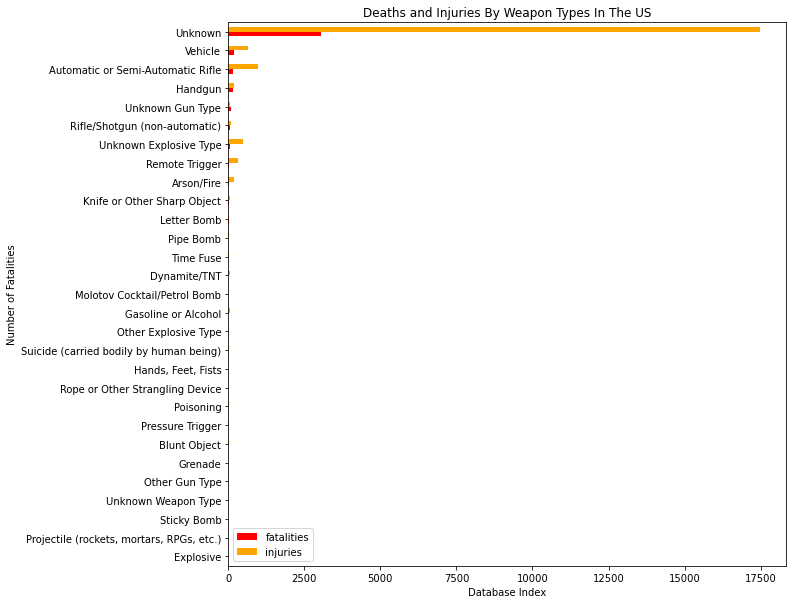

In [26]:
# Total fatalities and injuries by weapons
terror_weapon = pd.DataFrame(terror_us.groupby('weapon')['fatalities', 'injuries'].sum().sort_values(by=['fatalities','injuries']))

# Plot
terror_weapon.plot(kind = 'barh', color = ['red', 'orange'], figsize = (10,10))

plt.title('Deaths and Injuries By Weapon Types In The US')
plt.ylabel('Number of Fatalities')
plt.xlabel('Database Index')

plt.show()

### Terrorist Attacks of a Particular year and their Locations

In [27]:
filterYear = terror_data['year'] == 1970

filterData = terror_data[filterYear] # filter data
# filterData.info()
reqFilterData = filterData.loc[:,'city':'longitude'] #We are getting the required fields
reqFilterData = reqFilterData.dropna() # drop NaN values in latitude and longitude
reqFilterDataList = reqFilterData.values.tolist()
# reqFilterDataList

map = folium.Map(location = [0, 30], tiles='CartoDB positron', zoom_start=2)
# clustered marker
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for point in range(0, len(reqFilterDataList)):
    folium.Marker(location=[reqFilterDataList[point][1],reqFilterDataList[point][2]], popup = reqFilterDataList[point][0]).add_to(markerCluster)
map

## Complete!